In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('HR_comma_sep.csv')
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [3]:
df.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64

In [4]:
df.left.value_counts()

0    11428
1     3571
Name: left, dtype: int64

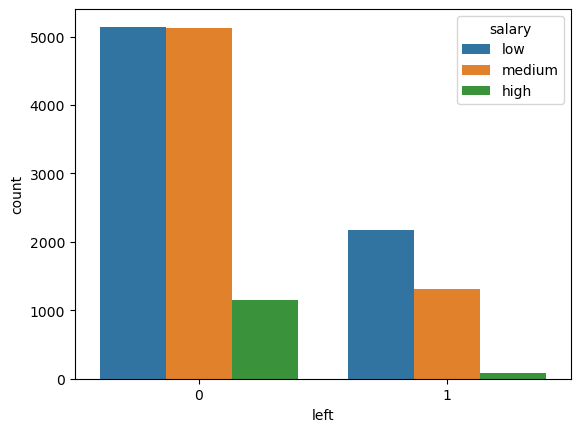

In [5]:
sns.countplot(x='left',hue='salary',data=df)
plt.show()

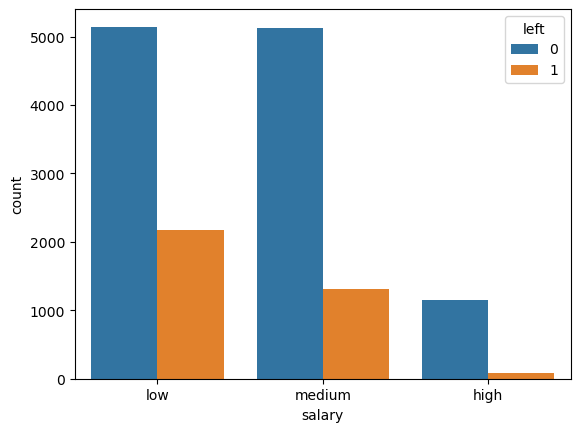

In [6]:
sns.countplot(x='salary',hue='left',data=df)
plt.show()

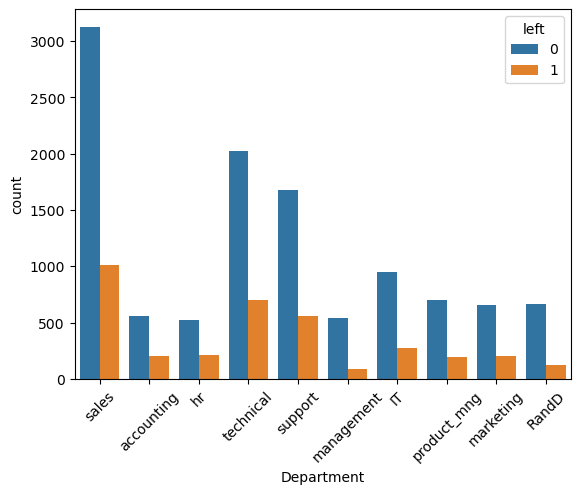

In [7]:
sns.countplot(x='Department',hue='left',data=df)
plt.xticks(rotation=45)
plt.show()

In [8]:
df.groupby('Department')['left'].value_counts()

Department   left
IT           0        954
             1        273
RandD        0        666
             1        121
accounting   0        563
             1        204
hr           0        524
             1        215
management   0        539
             1         91
marketing    0        655
             1        203
product_mng  0        704
             1        198
sales        0       3126
             1       1014
support      0       1674
             1        555
technical    0       2023
             1        697
Name: left, dtype: int64

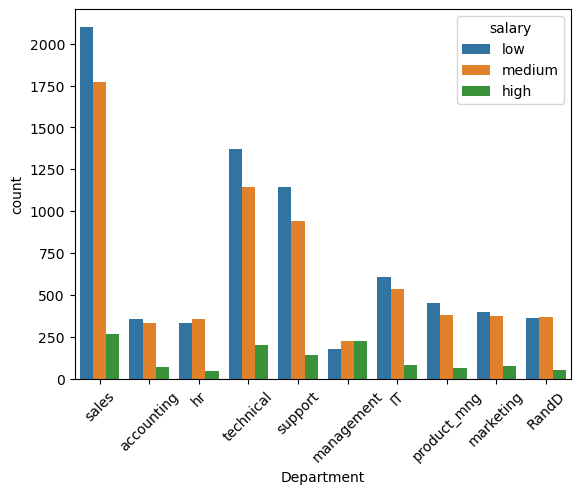

In [9]:
sns.countplot(x='Department',hue='salary',data=df)
plt.xticks(rotation=45)
plt.show()

In [10]:
df1 = df[['satisfaction_level','average_montly_hours','promotion_last_5years','salary']]
df1.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary
0,0.38,157,0,low
1,0.80,262,0,medium
2,0.11,272,0,medium
3,0.72,223,0,low
4,0.37,159,0,low


In [11]:
dummies = pd.get_dummies(df1['salary'],drop_first=True)
dummies

,low,medium
0,1,0
1,0,1
2,0,1
3,1,0
4,1,0
...,...,...
14994,1,0
14995,1,0
14996,1,0
14997,1,0


In [12]:
merged = pd.concat([df1,dummies],axis=1)
merged

,satisfaction_level,average_montly_hours,promotion_last_5years,salary,low,medium
0,0.38,157,0,low,1,0
1,0.80,262,0,medium,0,1
2,0.11,272,0,medium,0,1
3,0.72,223,0,low,1,0
4,0.37,159,0,low,1,0
...,...,...,...,...,...,...
14994,0.40,151,0,low,1,0
14995,0.37,160,0,low,1,0
14996,0.37,143,0,low,1,0
14997,0.11,280,0,low,1,0


In [13]:
merged.drop('salary',axis=1,inplace=True)
merged

,satisfaction_level,average_montly_hours,promotion_last_5years,low,medium
0,0.38,157,0,1,0
1,0.80,262,0,0,1
2,0.11,272,0,0,1
3,0.72,223,0,1,0
4,0.37,159,0,1,0
...,...,...,...,...,...
14994,0.40,151,0,1,0
14995,0.37,160,0,1,0
14996,0.37,143,0,1,0
14997,0.11,280,0,1,0


In [14]:
X = merged.values
X

array([[3.80e-01, 1.57e+02, 0.00e+00, 1.00e+00, 0.00e+00],
       [8.00e-01, 2.62e+02, 0.00e+00, 0.00e+00, 1.00e+00],
       [1.10e-01, 2.72e+02, 0.00e+00, 0.00e+00, 1.00e+00],
       ...,
       [3.70e-01, 1.43e+02, 0.00e+00, 1.00e+00, 0.00e+00],
       [1.10e-01, 2.80e+02, 0.00e+00, 1.00e+00, 0.00e+00],
       [3.70e-01, 1.58e+02, 0.00e+00, 1.00e+00, 0.00e+00]])

In [15]:
y = df.left
y

0        1
1        1
2        1
3        1
4        1
        ..
14994    1
14995    1
14996    1
14997    1
14998    1
Name: left, Length: 14999, dtype: int64

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score

In [17]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [18]:
X_train

array([[4.80e-01, 1.50e+02, 0.00e+00, 1.00e+00, 0.00e+00],
       [3.60e-01, 1.52e+02, 0.00e+00, 1.00e+00, 0.00e+00],
       [1.10e-01, 2.87e+02, 0.00e+00, 1.00e+00, 0.00e+00],
       ...,
       [8.50e-01, 1.84e+02, 0.00e+00, 0.00e+00, 1.00e+00],
       [4.90e-01, 1.73e+02, 0.00e+00, 0.00e+00, 1.00e+00],
       [8.00e-01, 2.38e+02, 0.00e+00, 0.00e+00, 0.00e+00]])

In [20]:
X_test

array([[  0.5 , 173.  ,   0.  ,   0.  ,   1.  ],
       [  0.77, 134.  ,   1.  ,   1.  ,   0.  ],
       [  0.85, 250.  ,   0.  ,   1.  ,   0.  ],
       ...,
       [  0.41, 274.  ,   0.  ,   0.  ,   1.  ],
       [  0.8 , 224.  ,   0.  ,   0.  ,   1.  ],
       [  0.69, 233.  ,   0.  ,   1.  ,   0.  ]])

In [21]:
model = LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [22]:
y_pred = model.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [23]:
cm = confusion_matrix(y_pred,y_test)
cm

array([[2139,  534],
       [ 138,  189]], dtype=int64)

<AxesSubplot: >

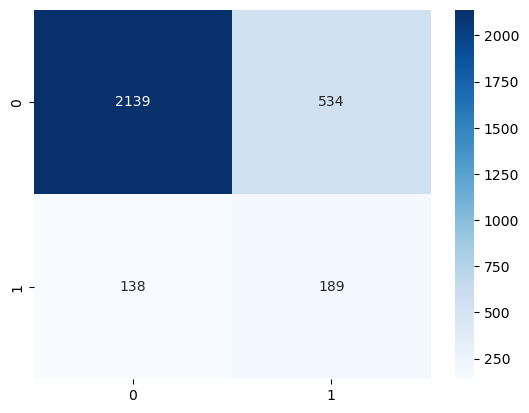

In [29]:
sns.heatmap(cm,annot=True,cmap='Blues',fmt='.4g')

In [31]:
model.score(X_test,y_test)

0.776

In [32]:
print(accuracy_score(y_test,y_pred))

0.776
